In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
data_corrected = {
    "AI": {
        "Models": ["OpenAI GPT", "LLama", "Mistral", "Ollama"],
        "Orchestration & Agent": ["Langchain", "Autogen"],
        "Visual": ["A1111", "ControlNet", "ComfyUI"]
    },
    "Methodologie": {
        "Agile": ["Scrum", "Kanban"],
        "Traditionnelles": ["Prince2", "PMP"],
        "Soft": ["Jira", "Confluence", "LucidChart"]
    },
    "Techniques de conception": {
        "Modélisation": ["UML"],
        "Design": ["Design System", "Design Pattern", "Design Thinking"],
        "Devt dirigé tests": ["BDD", "TDD"],
        "Spécifications": ["Gherkin"],
        "Priorisation": ["MoSCoW"]
    },
    "Langages": {
        "Généraux": ["C++", "Python", "Javascript"],
        "Frontend": ["React", "R3F", "HTML", "CSS"]
    },
    "Framework": {
        "Web": ["Django", "API Rest", "Node Js"],
        "Architecture logicielles": ["MVC", "Event Driven Architecture", "microservices"]
    },
    "Analyse de données": {
        "Librairires Python": ["Numpy", "Pandas", "Seaborn", "Scikit-Learn"],
        "Environnements": ["Google Colab", "Jupyter notebook", "Delta Lake", "Apache Spark"]
    },
    "DB": ["Relational", "NoSQL", "Graph (Neo4j)", "Vector"],
    "DevOps et cloud": {
        "Infrastructure cloud": ["Azure", "AWS", "Clevercloud"],
        "Déploiement continu": ["Gitlab CI/CD"]
    }
}

In [3]:
node_sizes = []

In [11]:
G = nx.DiGraph()

In [12]:
for parent, children in data_corrected.items():
    G.add_node(parent, size=6000)
    node_sizes.append(6000)
   
    if isinstance(children, dict):
        for subcategory, elements in children.items():
            G.add_node(subcategory, size=3000)
            node_sizes.append(3000)
            G.add_edge(parent, subcategory)
            for element in elements:
                G.add_node(element, size=1500)
                node_sizes.append(1500)
                G.add_edge(subcategory, element)
    else:
        for element in children:
            G.add_node(element, size=1500)
            node_sizes.append(1500)
            G.add_edge(parent, element)

Text(0.5, 1.0, 'Visualisation du tableau avec catégories principales plus grandes')

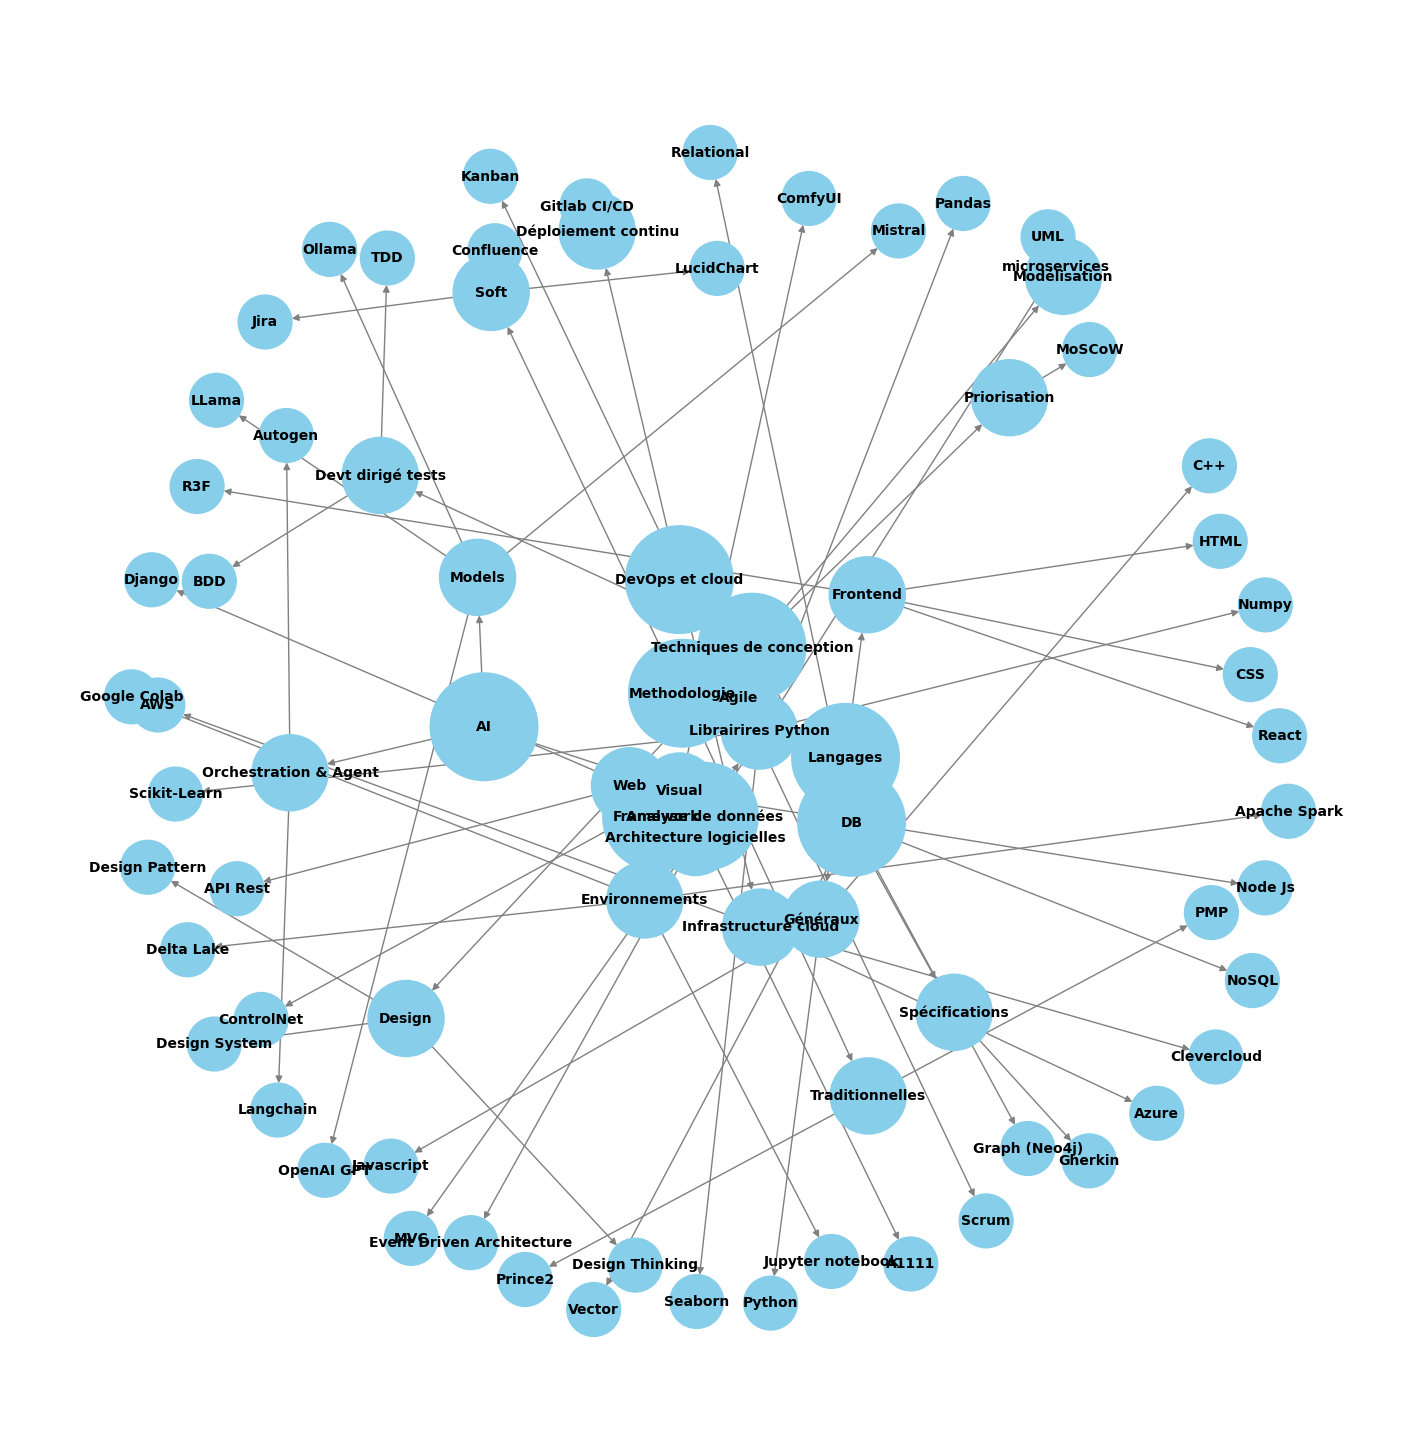

In [13]:
# Visualisation du graphe avec les tailles de nœuds ajustées
plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G, seed=42)
node_sizes = [G.nodes[n].get("size", 1500) for n in G.nodes]
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray", arrows=True)

plt.title("Visualisation du tableau avec catégories principales plus grandes")

## export graph to HTML with Pyvis

In [ ]:
pip install pyvis

In [ ]:
pip install --upgrade Jinja2 

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
node_sizes = []

In [18]:
myData = {
  "AI": {
    "GenAI": ["LLM", "RAG", "Vector DBs", "LangChain", "LLMOps"],
    "Modèles": ["OpenAI GPT", "LLaMA", "Mistral", "Ollama"],
    "Orchestration & Agents": ["LangChain", "Autogen"],
    "Vision IA": ["A1111", "ControlNet", "ComfyUI"]
  },
  "Gestion de Projet": {
    "Méthodologies Agile": ["Scrum", "Kanban"],
    "Méthodologies Traditionnelles": ["PRINCE2", "PMP"],
    "Outils Collaboratifs": ["Jira", "Confluence", "Lucidchart"]
  },
  "Compétences Techniques": {
    "Conception et Modélisation": {
      "Modélisation": "UML",
      "Design": ["Design Systems", "Design Patterns", "Design Thinking"],
      "Développement Dirigé par les Tests": ["BDD", "TDD"],
      "Spécifications": "Gherkin",
      "Priorisation": "MoSCoW"
    },
    "Langages de Programmation": {
      "Généraux": ["C++", "Python", "JavaScript", "SQL"],
      "Frontend": ["React", "R3F", "HTML", "CSS"]
    },
    "Frameworks et Architecture": {
      "Web": ["Django", "API Rest", "Node.js"],
      "Architecture Logicielle": ["MVC", "Event-Driven Architecture", "Microservices"]
    },
    "Frameworks et Outils de Machine Learning": ["PySpark", "TensorFlow", "PyTorch", "Spark"]
  },
  "Analyse de Données": {
    "Bibliothèques Python": ["Numpy", "Pandas", "Seaborn", "Scikit-Learn"],
    "Environnements": ["Google Colab", "Jupyter Notebook"],
    "Big Data": ["Delta Lake", "Apache Spark"]
  },
  "Bases de Données": {
    "Types de Bases de Données": ["Relationnelles", "NoSQL", "Graph (Neo4j)", "Vectorielles"]
  },
  "DevOps et Cloud": {
    "Infrastructure Cloud": ["Azure", "AWS", "Clevercloud"],
    "Déploiement Continu": ["GitLab CI/CD", "Jenkins"]
  }
}


In [25]:
# Création du graphe avec NetworkX
G = nx.DiGraph()

taille1 = 6000
taille2 = 3000
taille3 = 1500

for parent, children in myData.items():
    G.add_node(parent, size=taille1)
    if isinstance(children, dict):
        for subcategory, elements in children.items():
            G.add_node(subcategory, size=taille2)
            G.add_edge(parent, subcategory)
            for element in elements:
                G.add_node(element, size=taille3)
                G.add_edge(subcategory, element)
    else:
        for element in children:
            G.add_node(element, size=taille3)
            G.add_edge(parent, element)

# Utiliser la disposition spring_layout de networkx
pos = nx.spring_layout(G, seed=42)

# Initialiser le réseau avec Pyvis&
net = Network(height="100vh", width="100vw", directed=True, bgcolor="#000000", font_color="white")

# Ajouter les nœuds et arêtes au graphe Pyvis en utilisant les positions de spring_layout
for node, position in pos.items():
    x, y = position[0] * 1000, position[1] * 1000  # Pyvis utilise une échelle différente
    size = G.nodes[node].get("size", 20) / 40  # Réduire la taille des nœuds pour Pyvis
    
    # Appliquer les propriétés du groupe en fonction de la taille des nœuds
    if G.nodes[node]["size"] == taille1:  # Critère pour les nœuds principaux
        net.add_node(node, label=node, size=size, x=x, y=y, color="blue", group="taille1")
    elif G.nodes[node]["size"] == taille2:
        net.add_node(node, label=node, size=size, x=x, y=y, color="skyblue", group="taille2")
    else:
        net.add_node(node, label=node, size=size, x=x, y=y, color="skyblue", group="taille3")
    
# Ajouter les arêtes
for edge in G.edges:
    net.add_edge(edge[0], edge[1], color="gray")

# Désactiver la physique pour une disposition statique similaire à matplotlib
net.toggle_physics(True)

# Définir les options pour les groupes de nœuds, avec différentes couleurs et tailles de texte
net.set_options("""
var options = {
  "nodes": {
    "font": {
      "size": 50
    }
  },
 "physics": {
    "forceAtlas2Based": {
      "gravitationalConstant": -150,
      "centralGravity": 0.01,
      "springLength": 150,
      "springConstant": 0.08
    },
    "minVelocity": 0.75,
    "solver": "forceAtlas2Based",
    "timestep": 0.35,
     "stabilization": {
       "enabled": false 
                }
    },
  "groups": {
    "taille1": {
      "color": {
        "background": "LightBlue",
        "border": "#000000"
      },
      "font": {
        "size": 100,
        "color": "yellow"
      }
    },
    "taille2": {
      "color": {
        "background": "RoyalBlue"
      },
      "font": {
        "size": 80,
        "color": "red"
      }
    },
    "taille3": {
      "color": {
        "background": "DarkBlue"
      },
      "font": {
        "size": 50,
        "color": "white"
      }
    }
  }
}
""")

# Enregistrer et afficher le graphique interactif
net.write_html("graph_interactif.html")


add in HTML file

body {
        background-color: black;
    }

Modify

width: 100vw;

New code for better lisibility